### Implementation random no. generator 

##### Implement the linear congruential generator first for the choice $m=7,a=5,c=9$ and different values of $x_0$. Next, implement it for the choice $m=2^{31}-1$ , $a = 7^5$ , $c=12345$ and different values of $x_0$. Generate $n=100,500,1000,10000$ random number and draw a histogram. <br> Simulate the roll of a symmetric die and draw a histogram for several values of n. Repeat the exercise with the generators $random.random$ and $numpy.random.uniform$. Compare the time efficiency of these generators by using $time.time$. 

In [2]:
seed = 4

def RNG(m=7,a=5, c=9):
    global seed
    seed = (a*seed+ c)% m
    return seed/m


In [9]:
RNG()

0.14285714285714285

In [12]:
seed

1

In [3]:
seed = 4
RNG(a=5,c=9,m=7)

0.14285714285714285

In [53]:
#seed=4
for i in range (10):
    print ("seed = ",seed, "random number =", RNG())

seed =  5 random number = 0.8571428571428571
seed =  6 random number = 0.5714285714285714
seed =  4 random number = 0.14285714285714285
seed =  1 random number = 0.0
seed =  0 random number = 0.2857142857142857
seed =  2 random number = 0.7142857142857143
seed =  5 random number = 0.8571428571428571
seed =  6 random number = 0.5714285714285714
seed =  4 random number = 0.14285714285714285
seed =  1 random number = 0.0


In [62]:
#seed=4
for _ in range(10):
    print ("seed=",seed,"random number = ", 
           RNG(m=2**31-1, a=7**5,c=12345))

seed= 315925892 random number =  0.5526951540041226
seed= 1186903805 random number =  0.1474590958782747
seed= 316665997 random number =  0.3450301747513144
seed= 740946658 random number =  0.9221527939299833
seed= 1980308045 random number =  0.6220133298179197
seed= 1335763454 random number =  0.17803999836465345
seed= 382337985 random number =  0.3182582633189197
seed= 683454416 random number =  0.966637349671981
seed= 2075837901 random number =  0.2739416855731707
seed= 588285290 random number =  0.13791517686933055


In [64]:
import numpy as np
N=100000
X = np.zeros(N)

def rng(m=2**31-1, a=7**5,c=12345):
    global seed 
    seed = (a*seed + c) %m
    return seed/m
seed=4
for i in range(N):
    X[i]=rng()

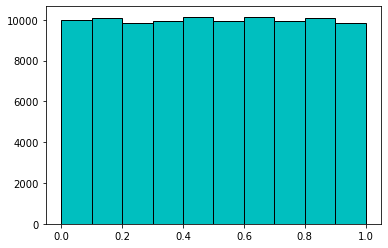

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X,bins=10,color='c',edgecolor='black')
plt.show()

### Simulation of rolls of a die
#### If U~ uni f(0,1), then int(6U+1) takes uniformly the values {1,2,3,4,5,6}.



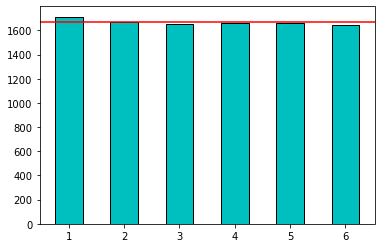

In [74]:
N= 10000
A=np.zeros(N)
for i in range(N):
    A[i]=int(6*rng()+1)
    
plt.hist(A, bins=np.arange(1,8),color='c',
        edgecolor='black',rwidth=0.5,align='left')
plt.axhline(y=N/6,color='red')


In [80]:
A

array([1., 1., 1., ..., 5., 3., 1.])

In [81]:
A==1

array([ True,  True,  True, ..., False, False,  True])

In [82]:
N/6, sum(A==1), sum(A==2), sum(A==3), sum(A==4), sum(A==5), sum(A==6),

(1666.6666666666667, 1714, 1668, 1650, 1665, 1660, 1643)

## Comparing the efficiency of several ways of generating a vector of random numbers 

In [95]:
import random
random.seed(100)
random.random()

0.1456692551041303

In [105]:
import time
N=10**7
t0=time.time()
a=[]
for i in range(N):
    a.append(rng())
    
'''a comment is to be written here 
'''

t1=time.time()
print(t1-t0)




7.864605665206909


In [109]:
type(a)

list

In [110]:
t0=time.time()
a=np.zeros(N)
for i in range(N):
    a[i]=rng()
t1=time.time()
t1-t0

8.815668106079102

In [111]:
type(a)

numpy.ndarray

In [112]:
t0=time.time()
a=[]
for i in range(N):
    a.append(random.random())
t1=time.time()
print(t1-t0)

2.7801990509033203


In [113]:
type(a)

list

In [114]:
t0=time.time()
b=np.zeros(N)
for i in range(N):
    b[i]=random.random()
t1=time.time()
print(t1-t0)

3.405254364013672


In [116]:
t0=time.time()
b=np.zeros(N)
c=[random.random() for _ in range(N)]
t1=time.time()
print(t1-t0)

2.2252159118652344


In [123]:
t0=time.time()
d=np.random.uniform(N)
t1=time.time()
print(t1-t0)

0.0009987354278564453
